# Setting up Data

In [1]:
import pandas as pd
import os

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [5]:
len(movies)

559

In [6]:
movies.head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [3]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head(10)

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [19]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [4]:
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

In [17]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [21]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [22]:
movies.Year.cat.categories

Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# JointPlot
---

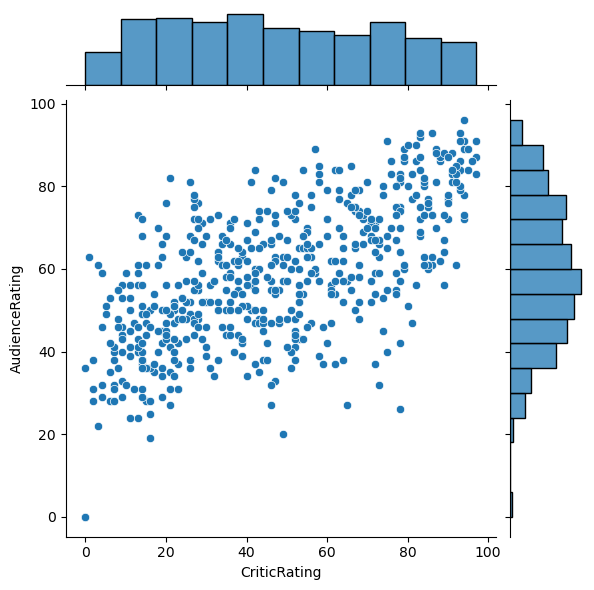

In [27]:
j = sns.jointplot(data=movies, x="CriticRating",y="AudienceRating")

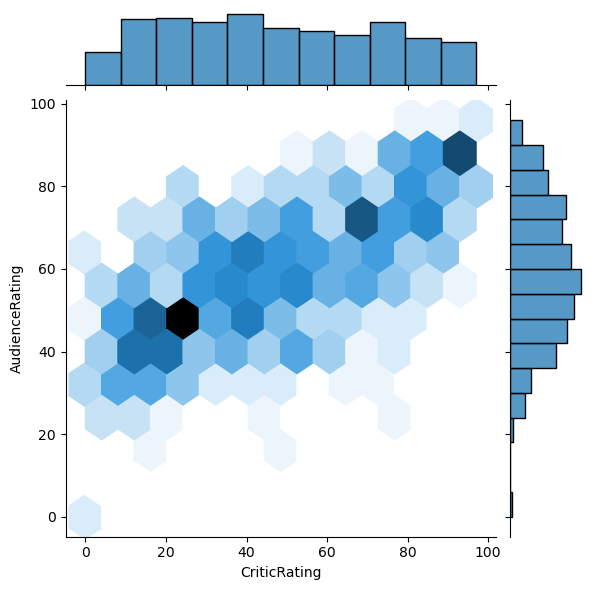

In [28]:
j = sns.jointplot(data=movies, x="CriticRating",y="AudienceRating", kind="hex")

# Histogram
---

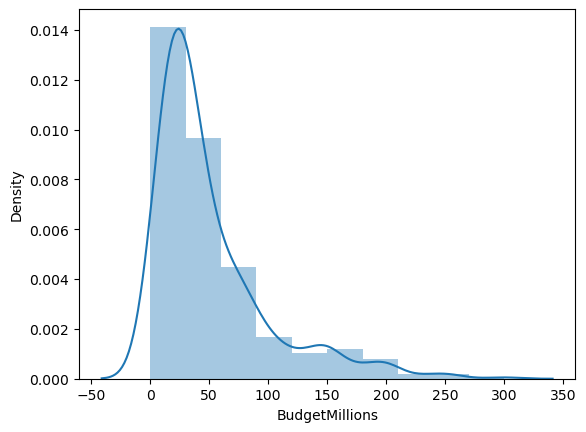

In [36]:
m1 = sns.distplot(movies.BudgetMillions, bins=10)

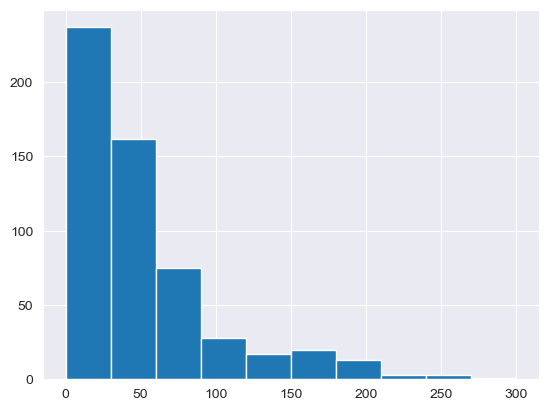

In [40]:
n1 = plt.hist(movies.BudgetMillions, bins=10)

In [44]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [6]:
sns.set_style("darkgrid")

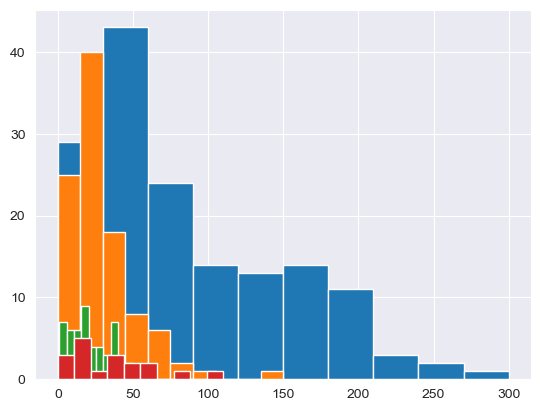

In [48]:
plt.hist(movies[movies.Genre == "Action"].BudgetMillions)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions)
plt.hist(movies[movies.Genre == "Horror"].BudgetMillions)
plt.hist(movies[movies.Genre == "Romance"].BudgetMillions)
plt.show()

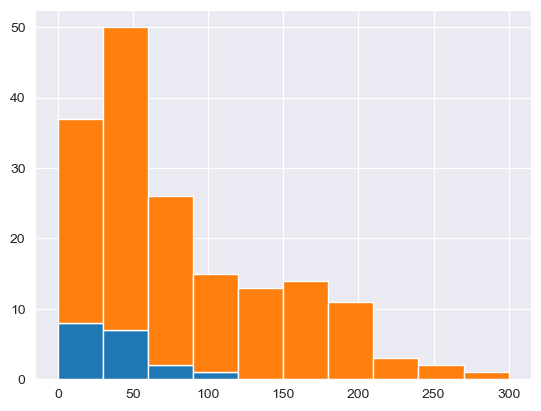

In [52]:
plt.hist([movies[movies.Genre == "Romance"].BudgetMillions, movies[movies.Genre == "Action"].BudgetMillions], stacked=True)
plt.show()

In [53]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


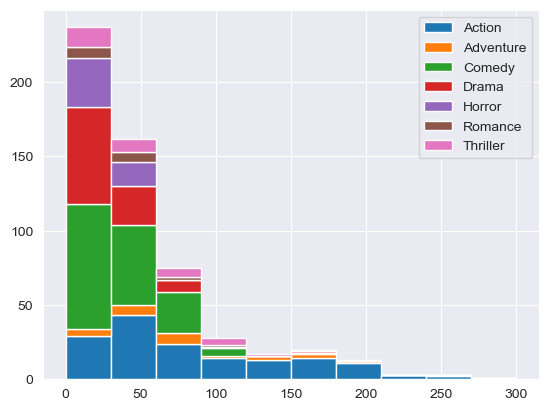

In [63]:
list1 = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
plt.hist(list1, stacked=True, bins=10, rwidth=1, label=mylabels)
plt.legend()
plt.show()

# KDE
---

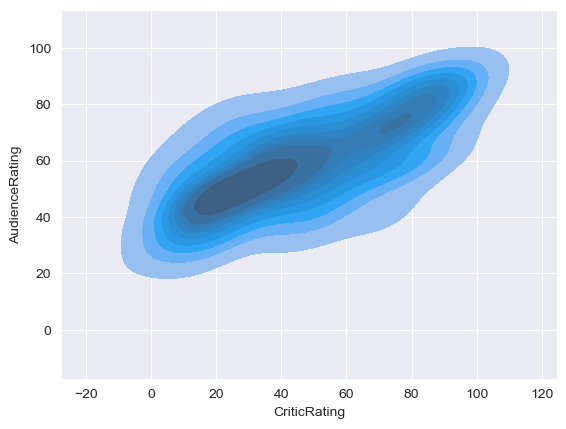

In [66]:
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True)

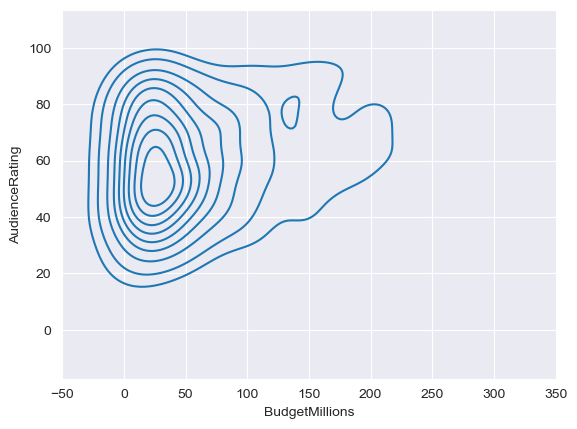

In [69]:
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating)

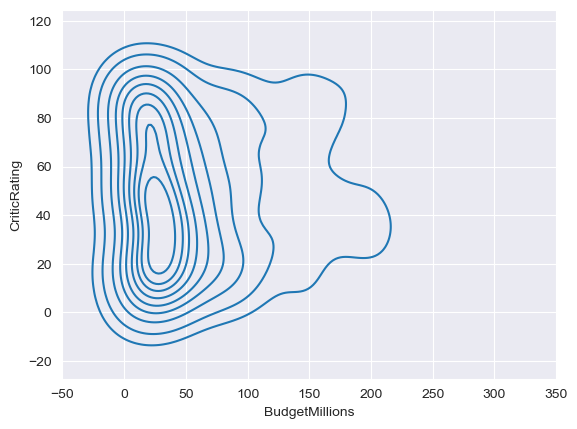

In [70]:
k3 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating)

# Subplots
---

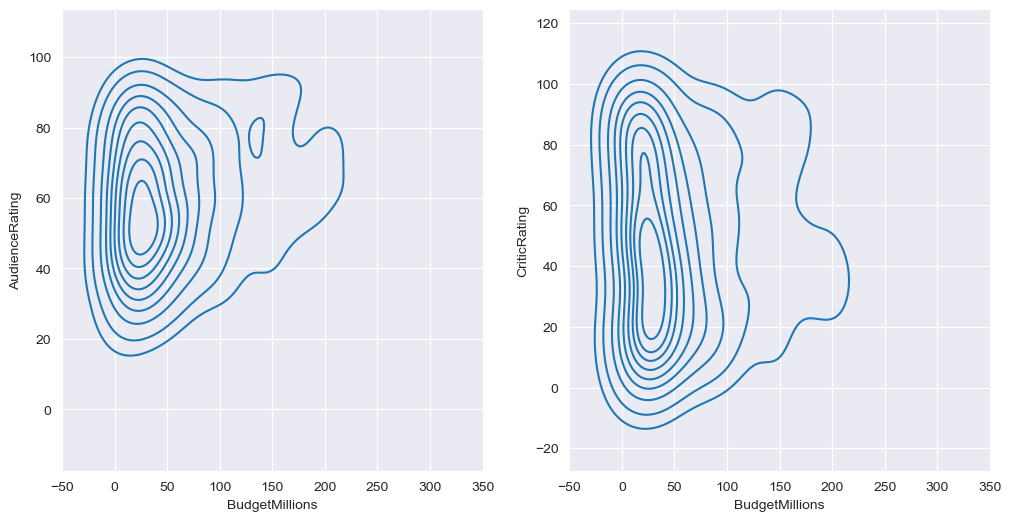

In [71]:
f, axes = plt.subplots(1,2, figsize=(12,6))
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, ax=axes[0])
k3 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating, ax=axes[1])

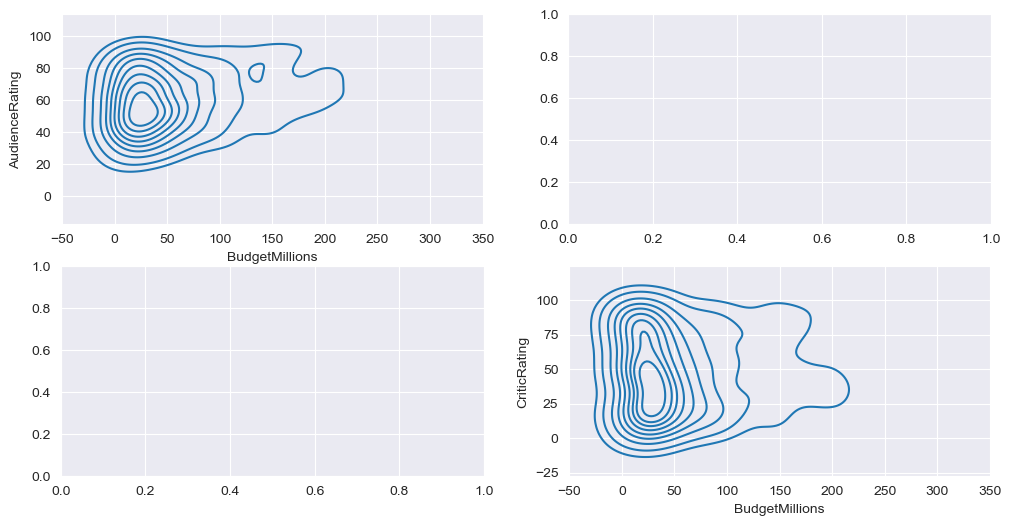

In [73]:
f, axes = plt.subplots(2,2, figsize=(12,6))
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, ax=axes[0,0])
k3 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating, ax=axes[1,1])

[(-40.0, 230.0)]

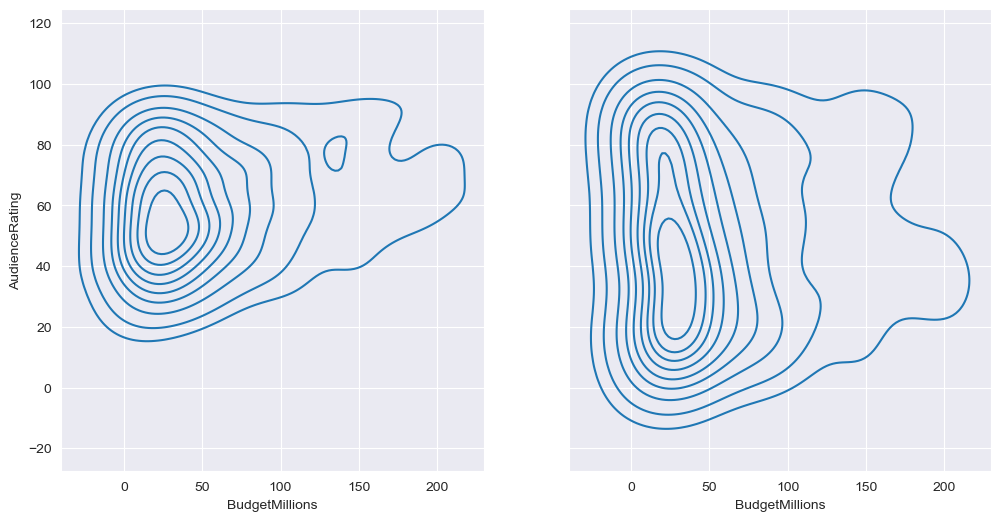

In [78]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, ax=axes[0])
k3 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating, ax=axes[1])
k2.set(xlim=(-40,230))

# Violinplot
---

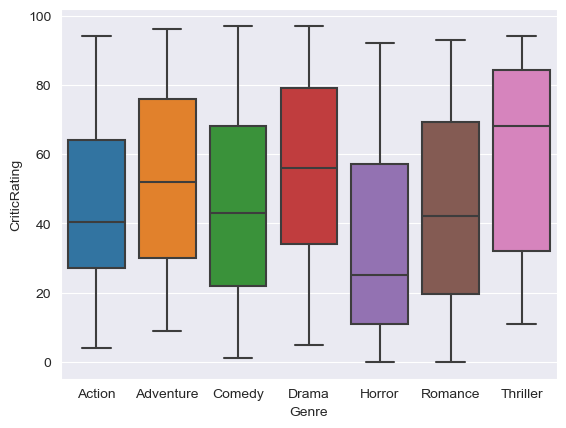

In [79]:
b = sns.boxplot(data=movies, x="Genre", y="CriticRating")

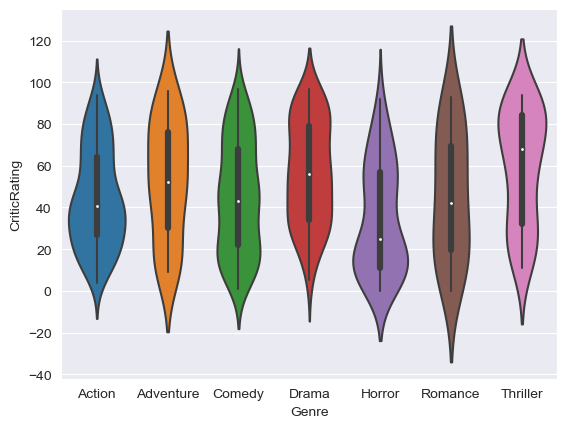

In [80]:
v = sns.violinplot(data=movies, x="Genre", y="CriticRating")

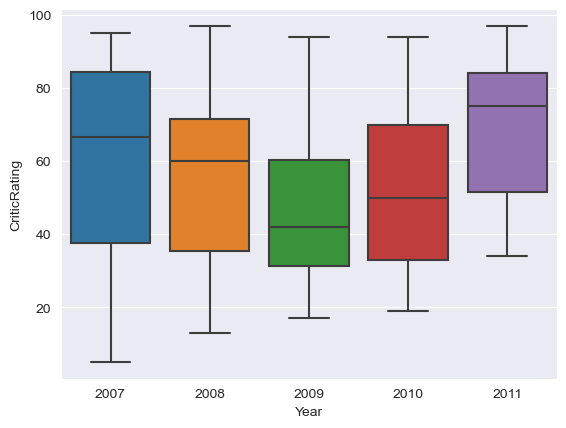

In [81]:
w2 = sns.boxplot(data= movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

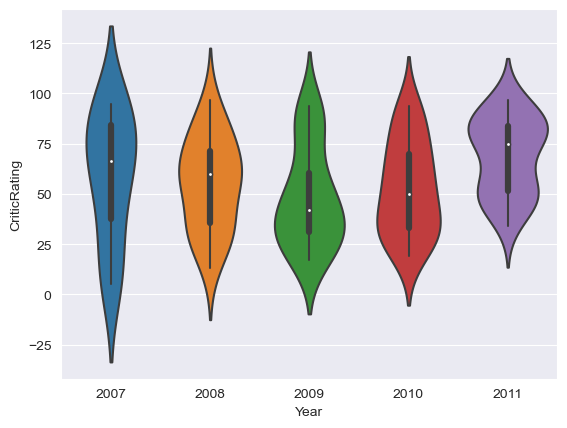

In [82]:
v2 = sns.violinplot(data= movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

# Facetgrid
---

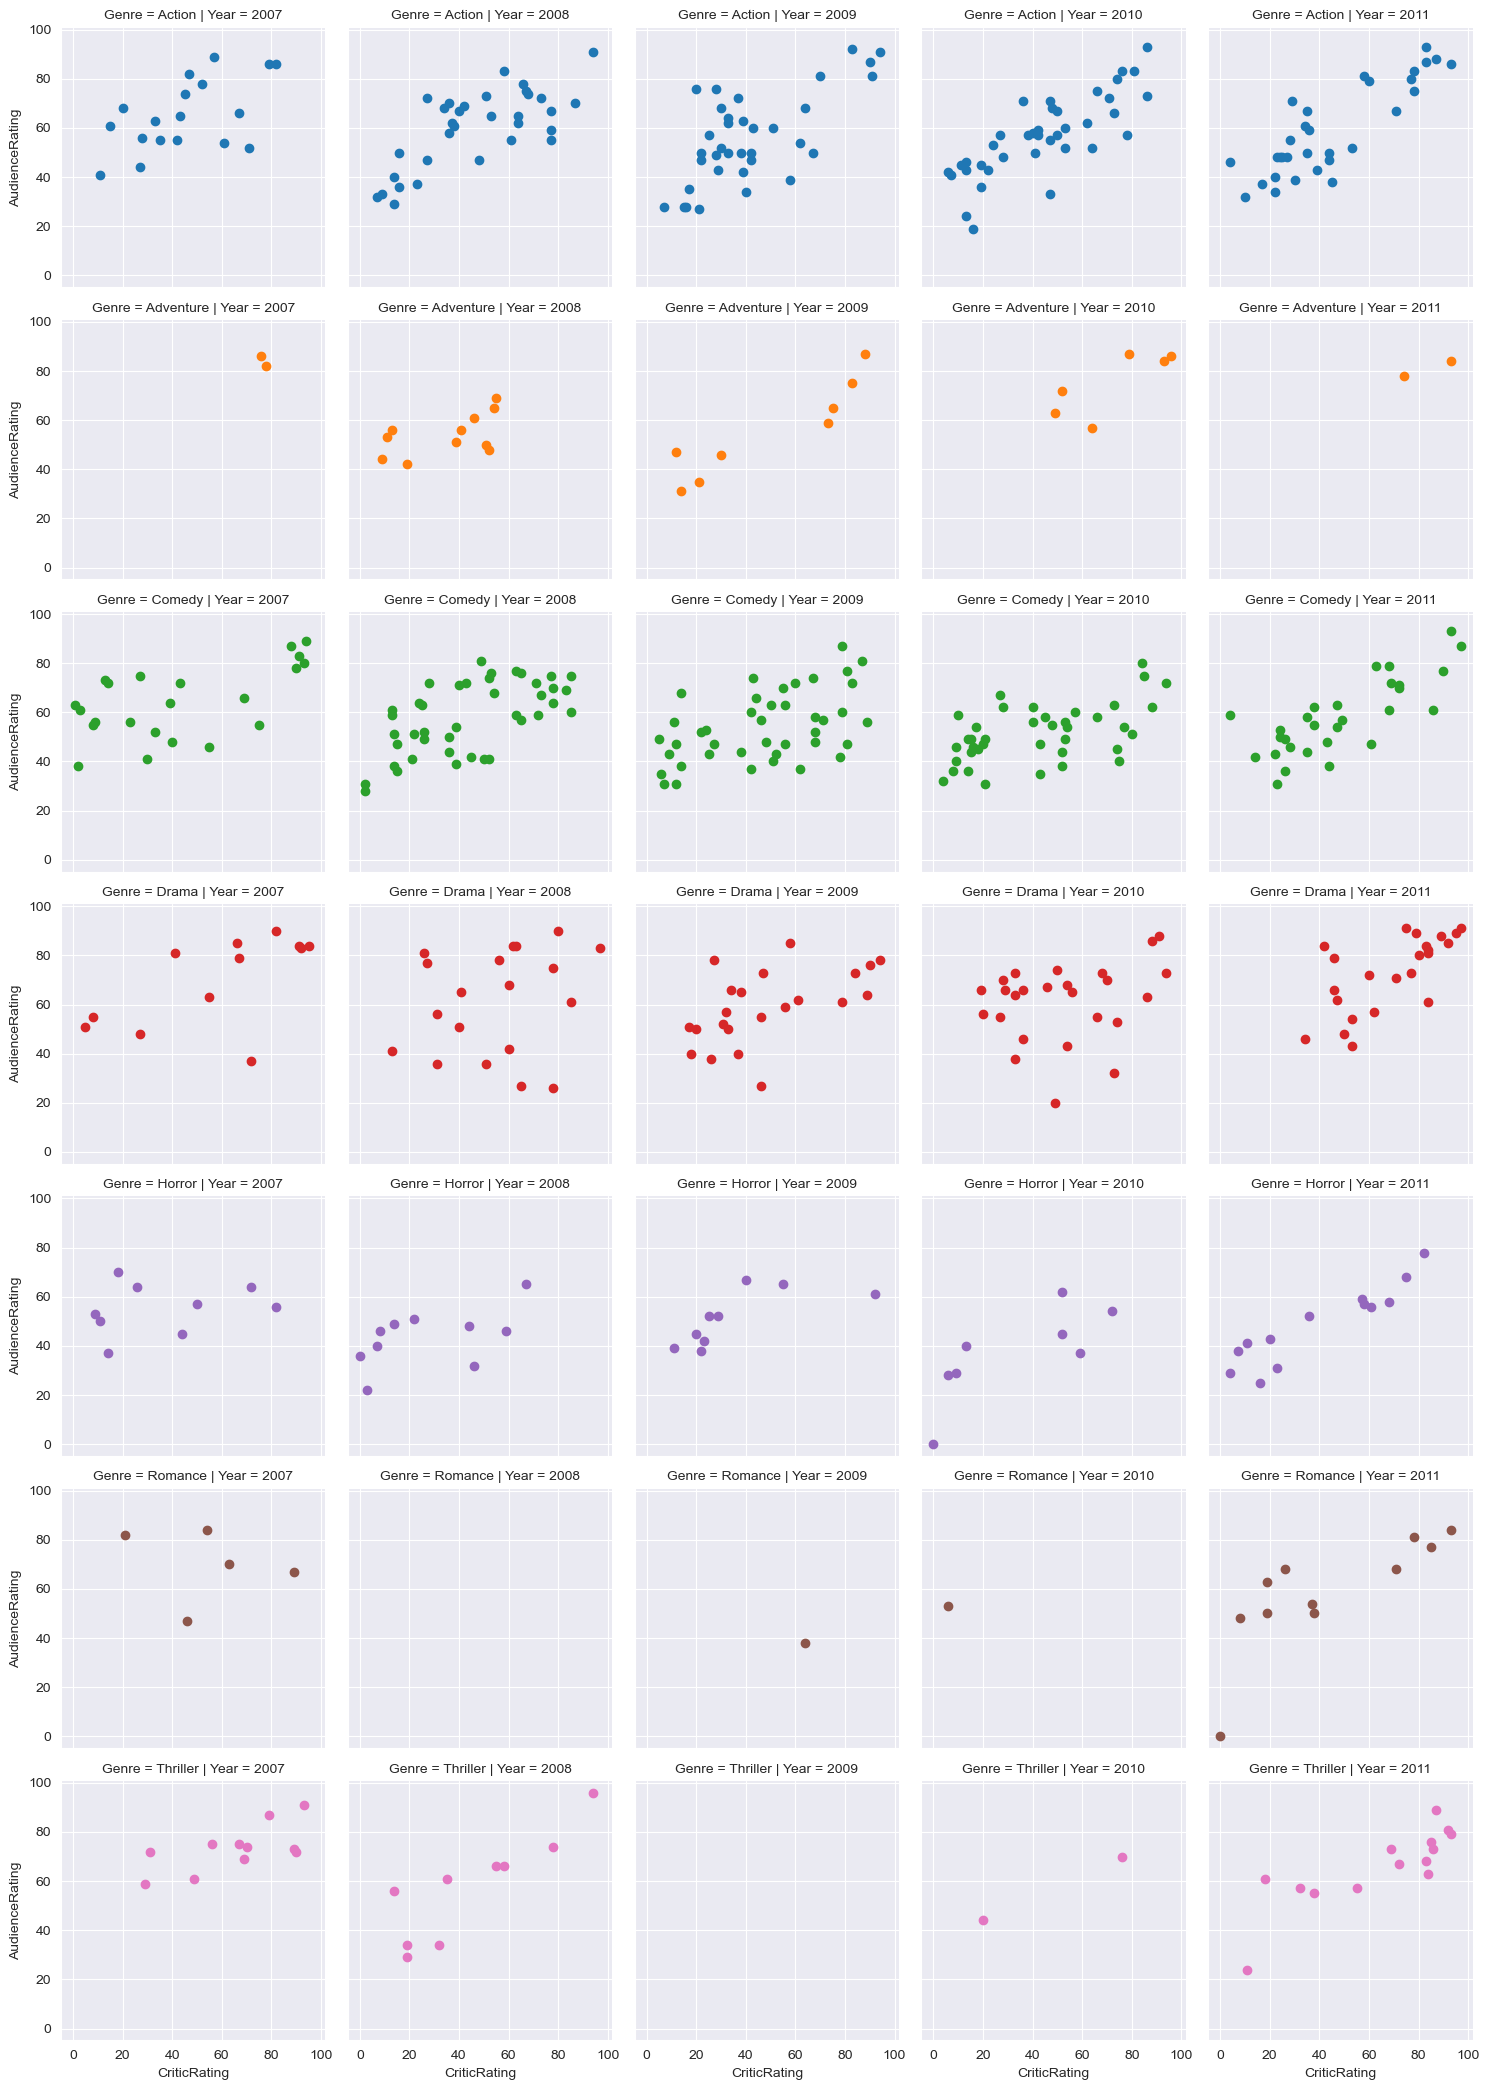

In [87]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.scatter, "CriticRating", "AudienceRating")

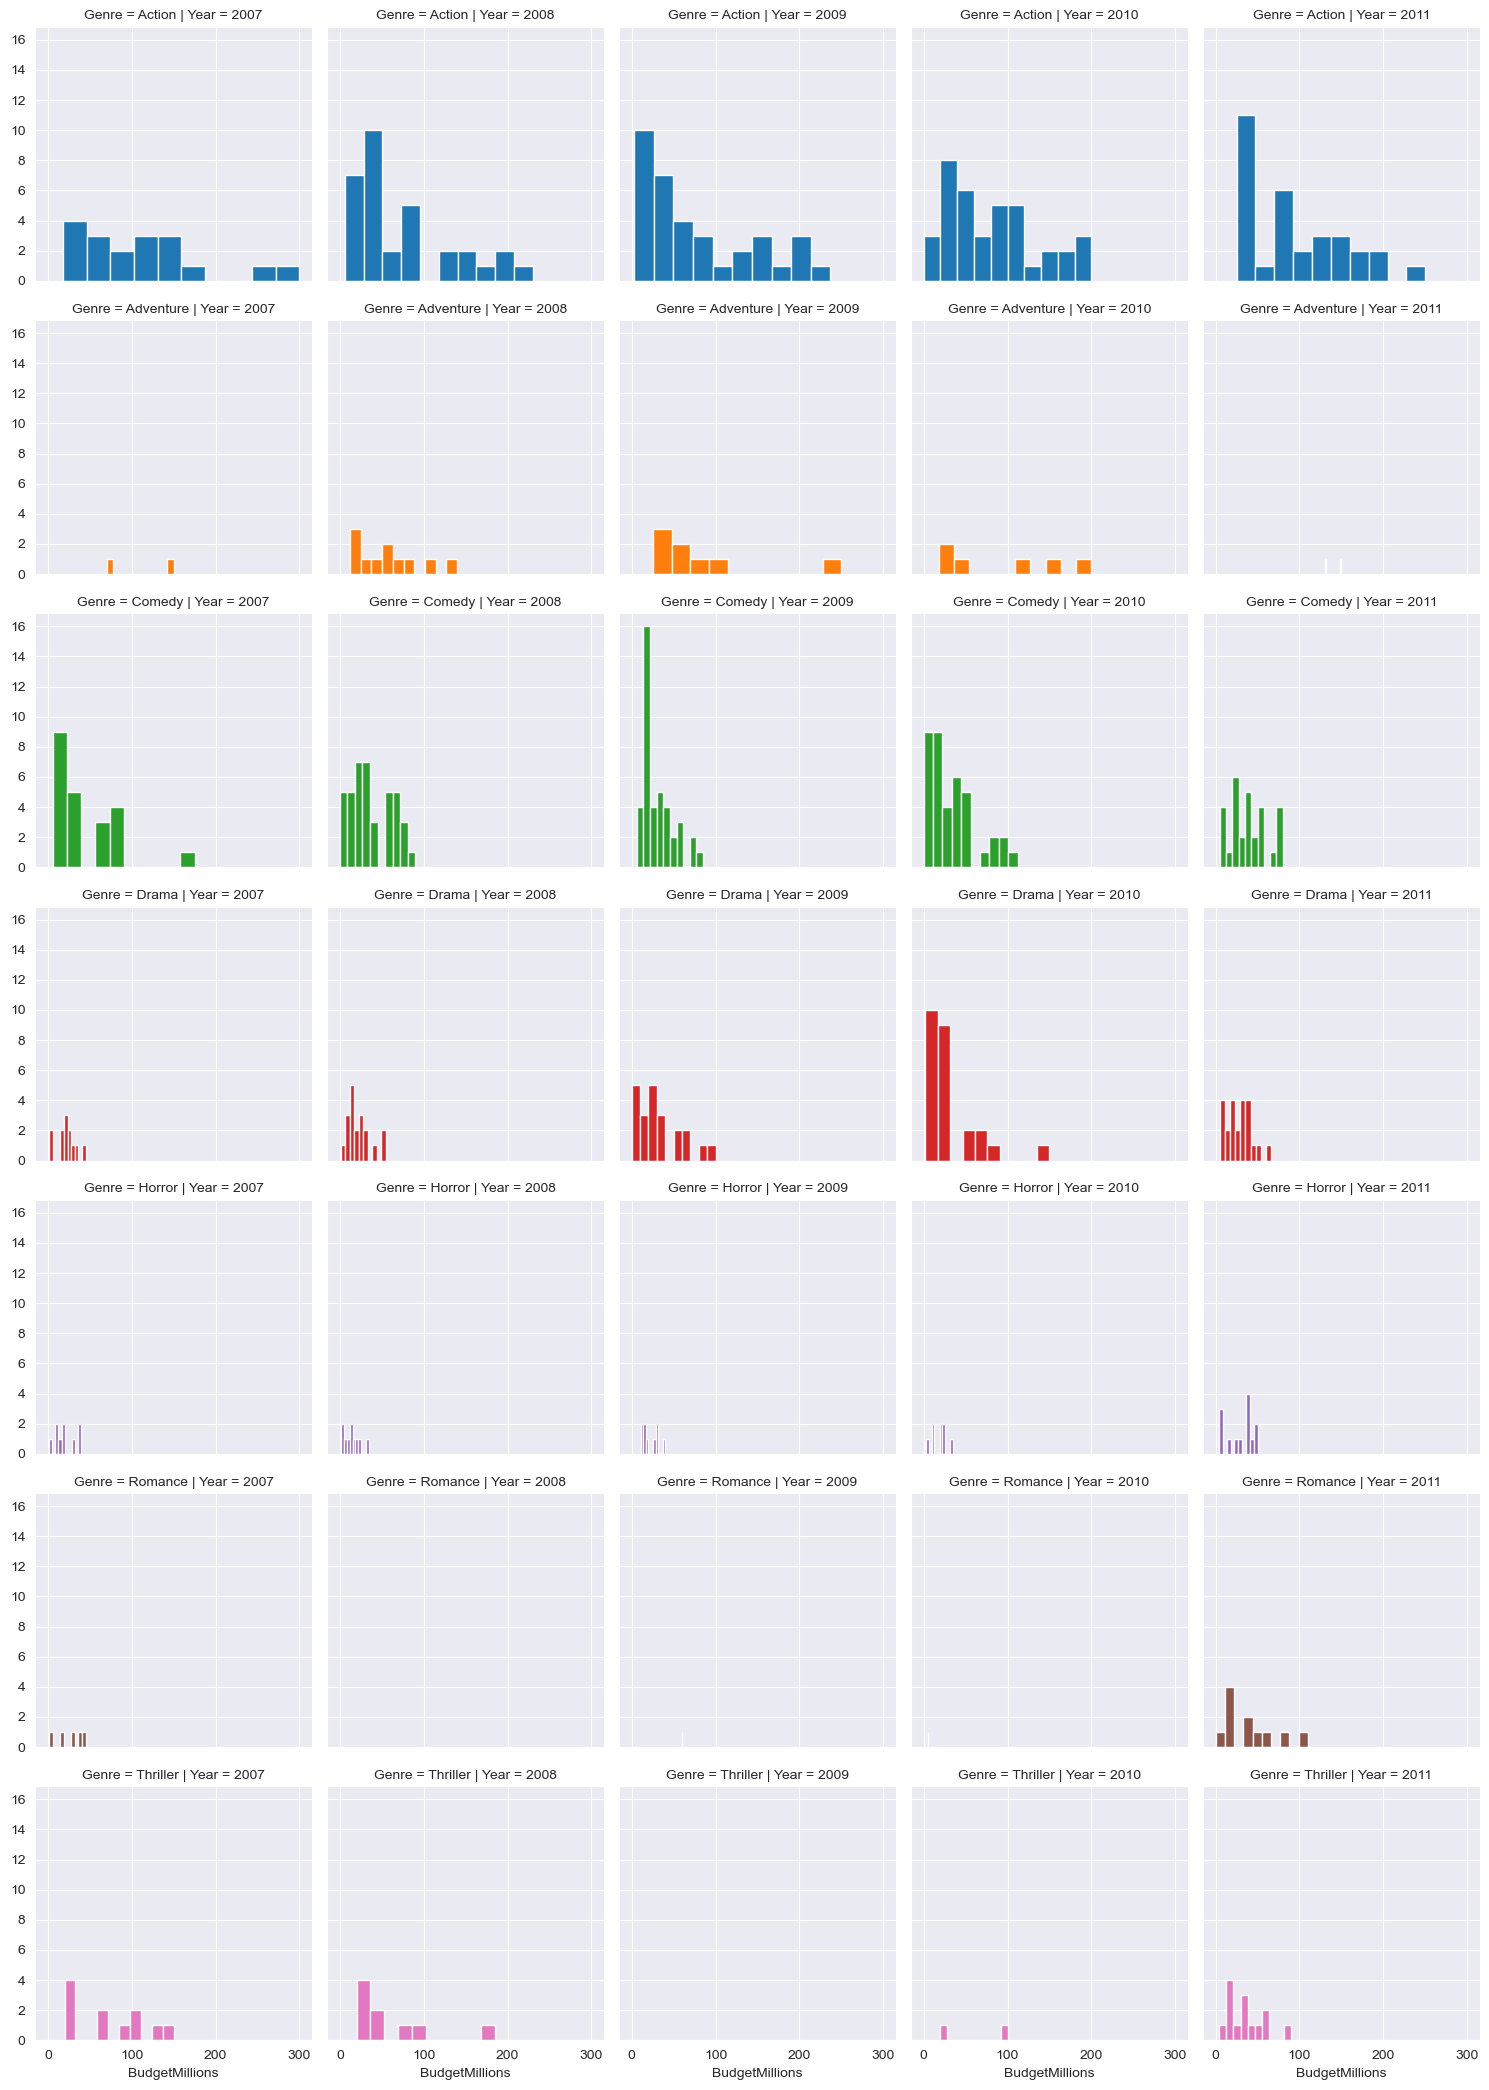

In [88]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.hist, "BudgetMillions")

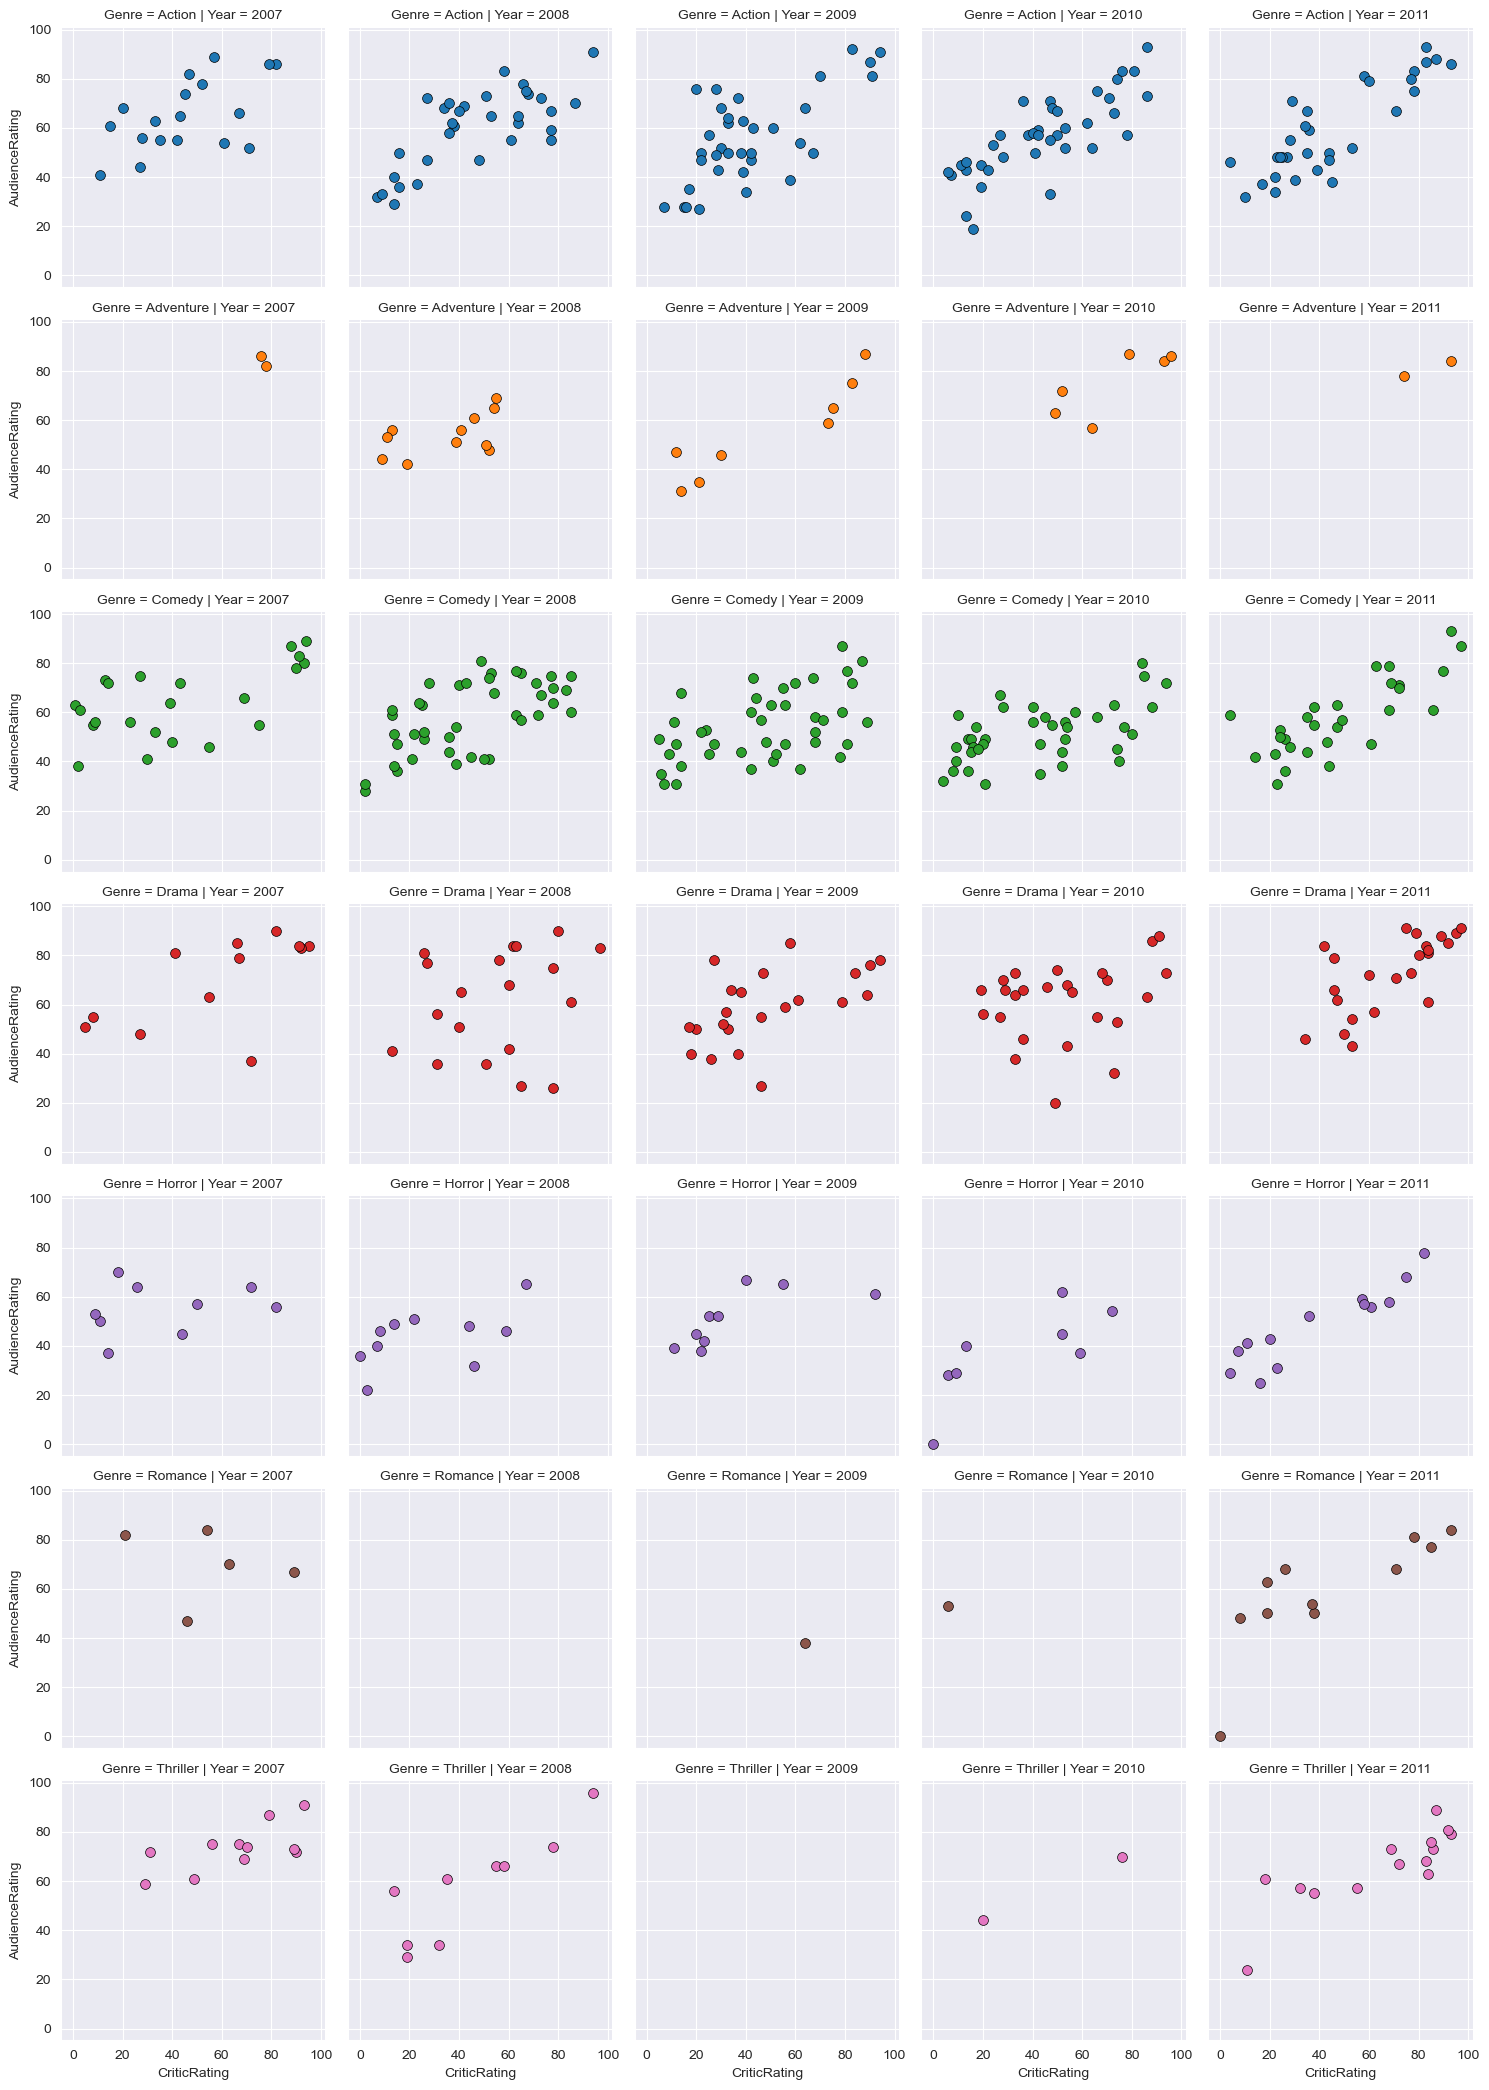

In [7]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)

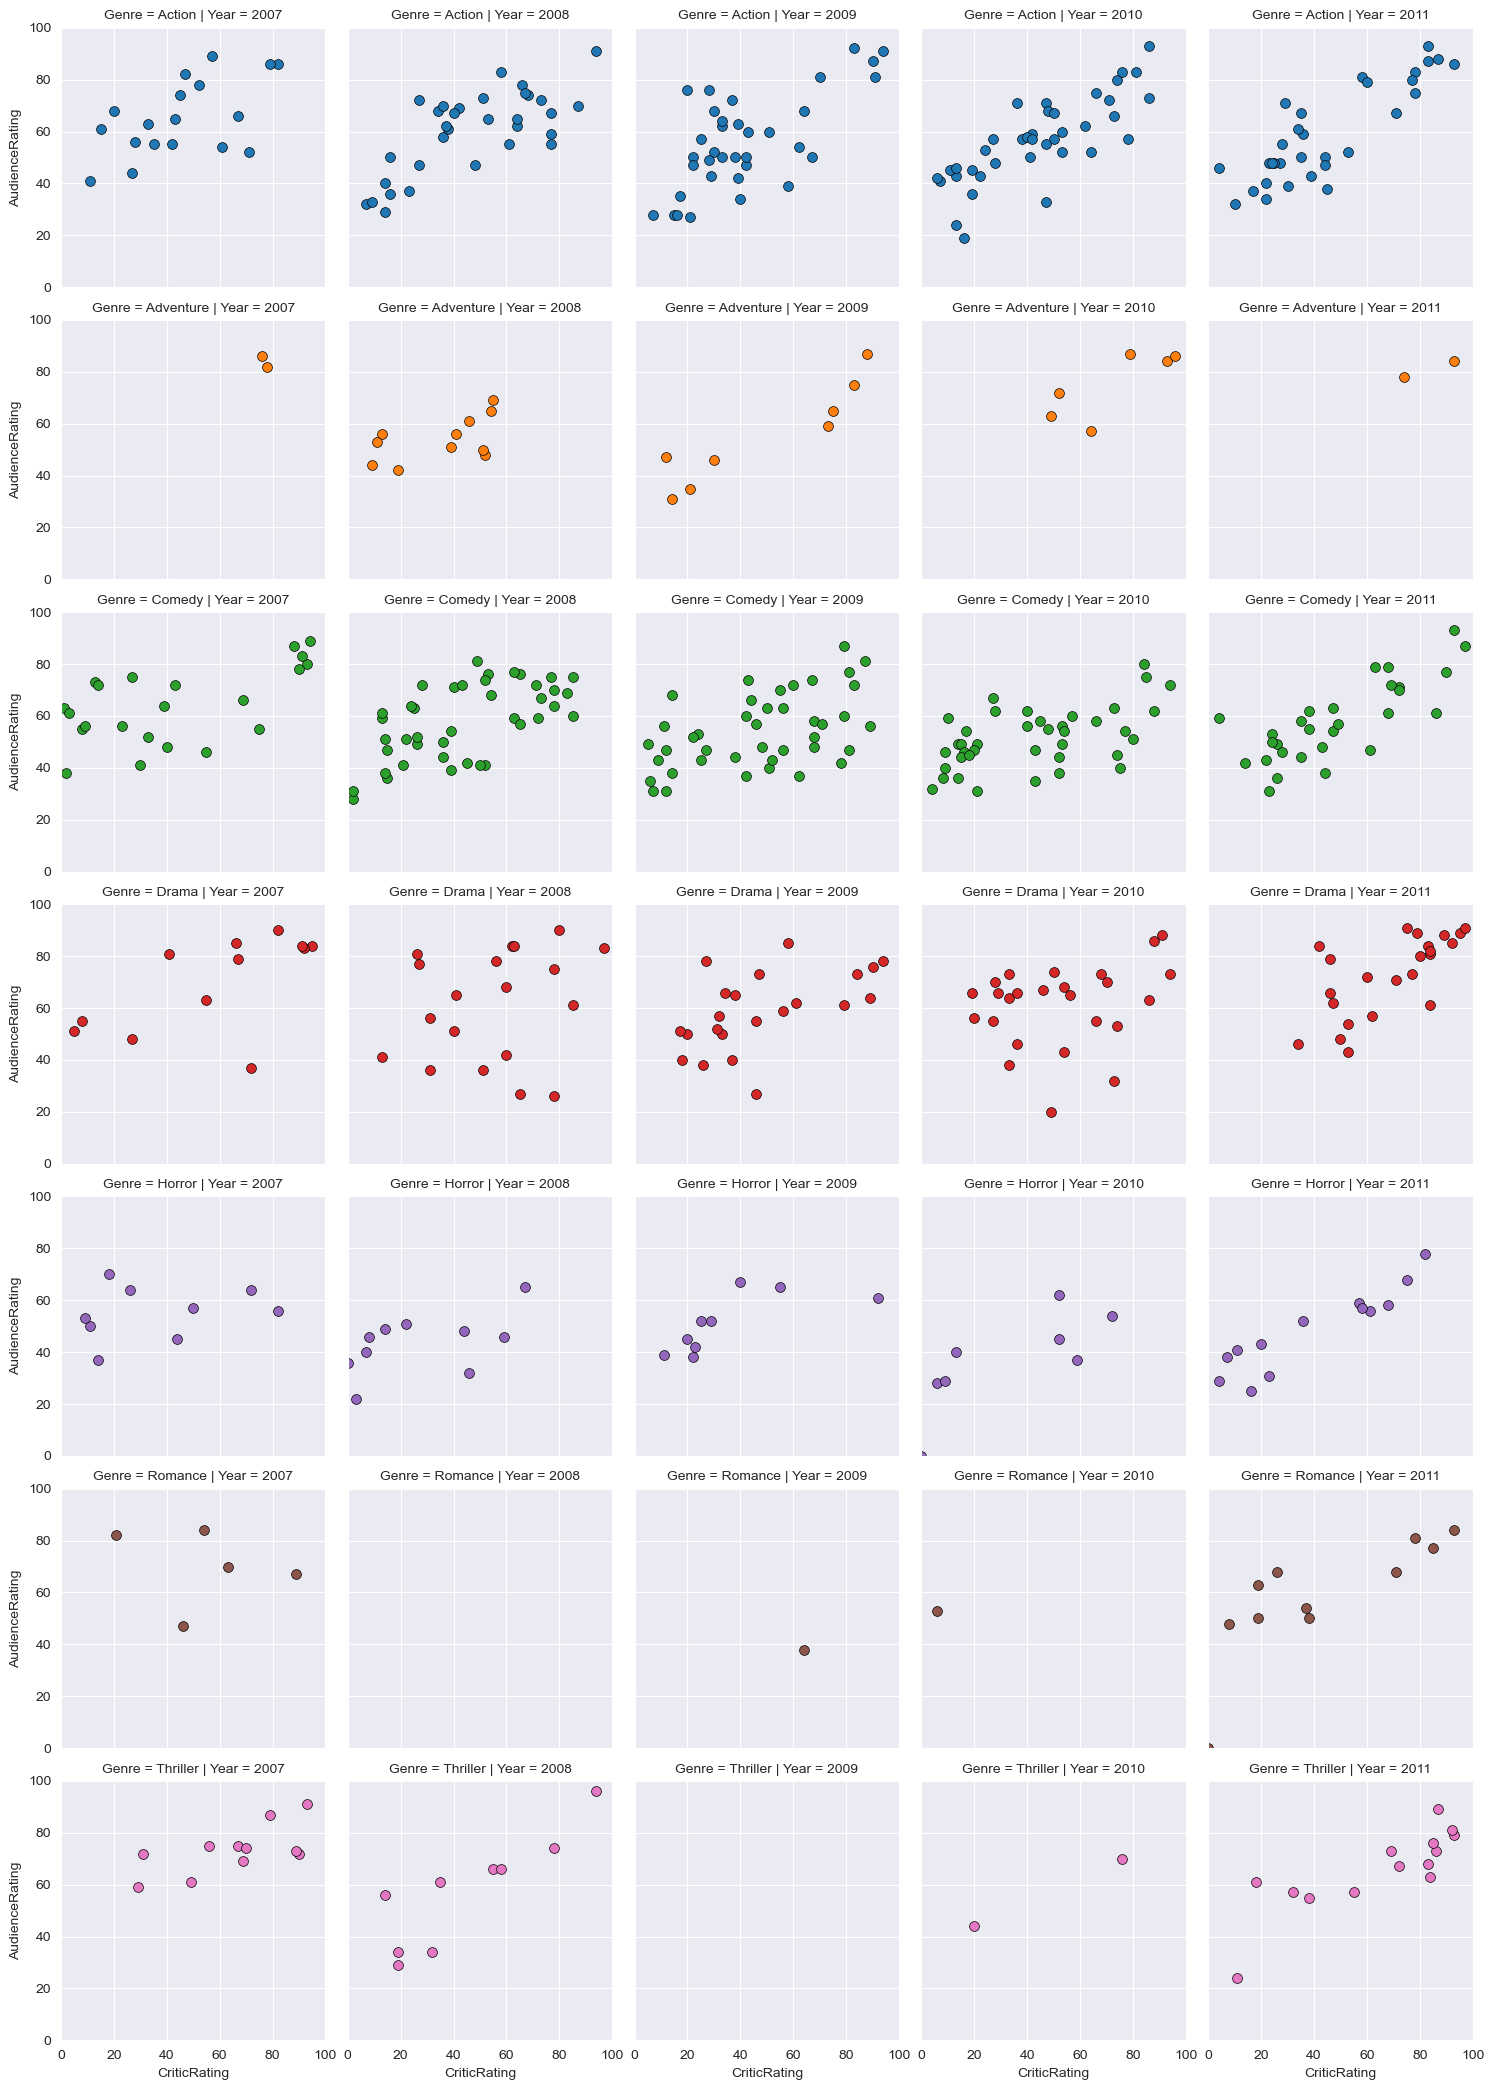

In [10]:
#Controliling Axes and Adding diagonals
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g.set(xlim=(0,100), ylim=(0,100))

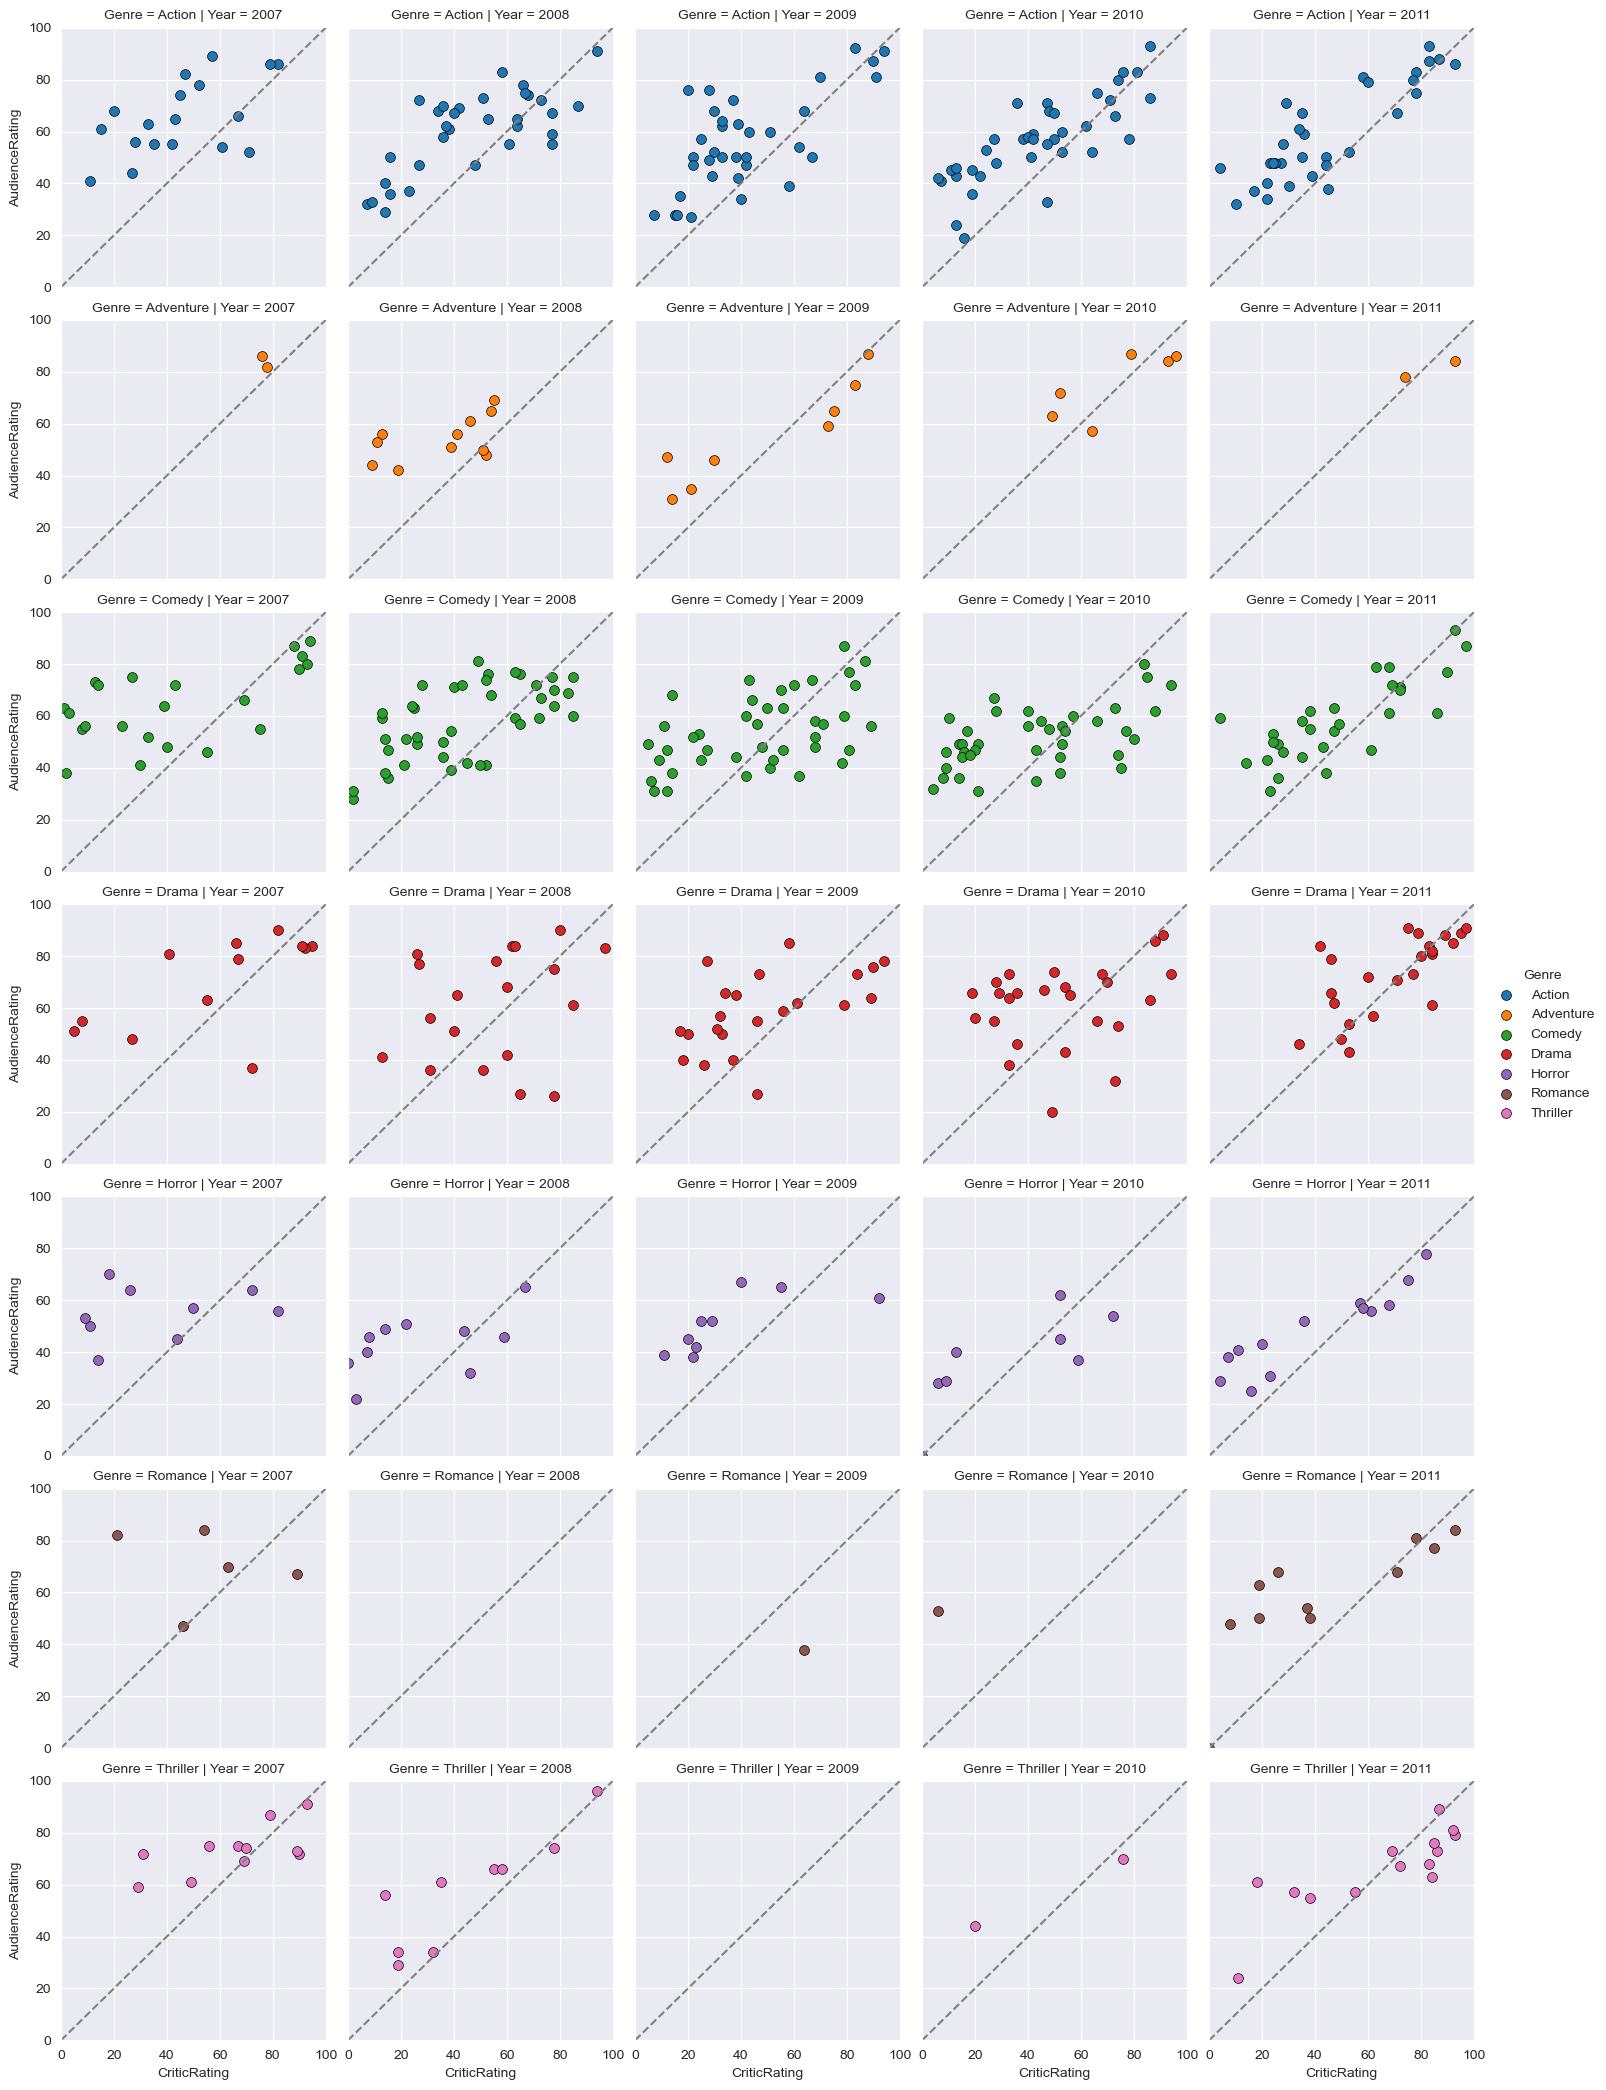

In [15]:
#Controliling Axes and Adding diagonals
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
	ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()

# Dashboards
---

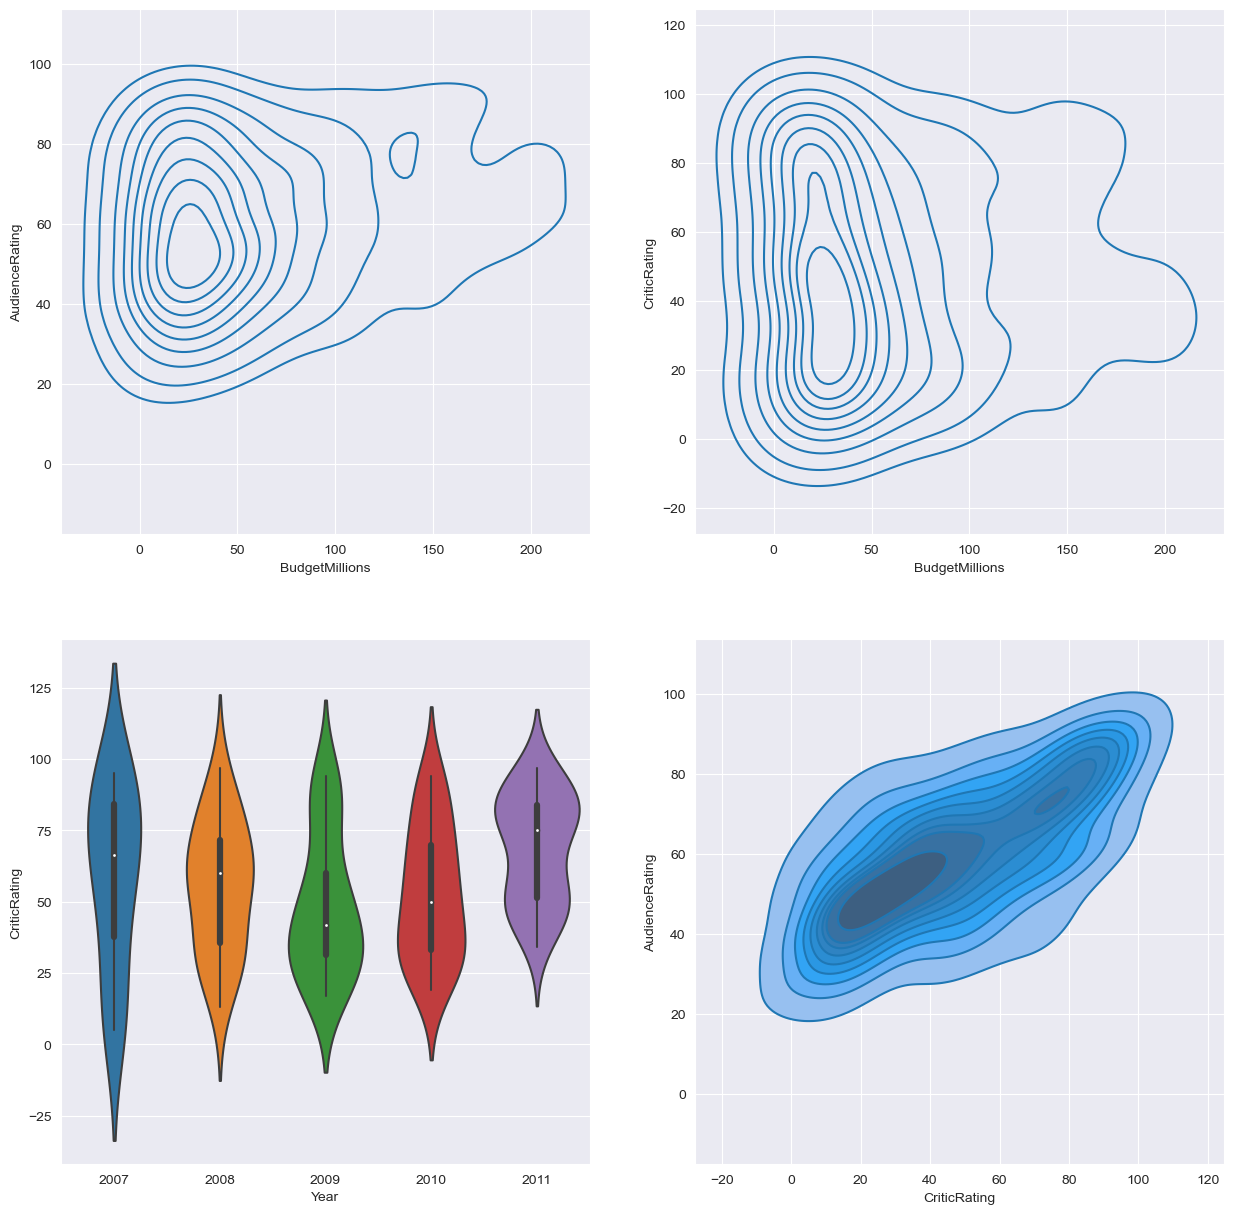

In [26]:
f, axes = plt.subplots(2,2, figsize=(15,15))
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, ax=axes[0,0])
k3 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating, ax=axes[0,1])
k2.set(xlim=(-40,230))
k3.set(xlim=(-40,230))
v2 = sns.violinplot(data= movies[movies.Genre=="Drama"], x="Year", y="CriticRating", ax=axes[1,0])
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, ax=axes[1,1])
k1b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, ax=axes[1,1])
#axes[1,1].hist(movies.BudgetMillions, bins=10)

plt.show()

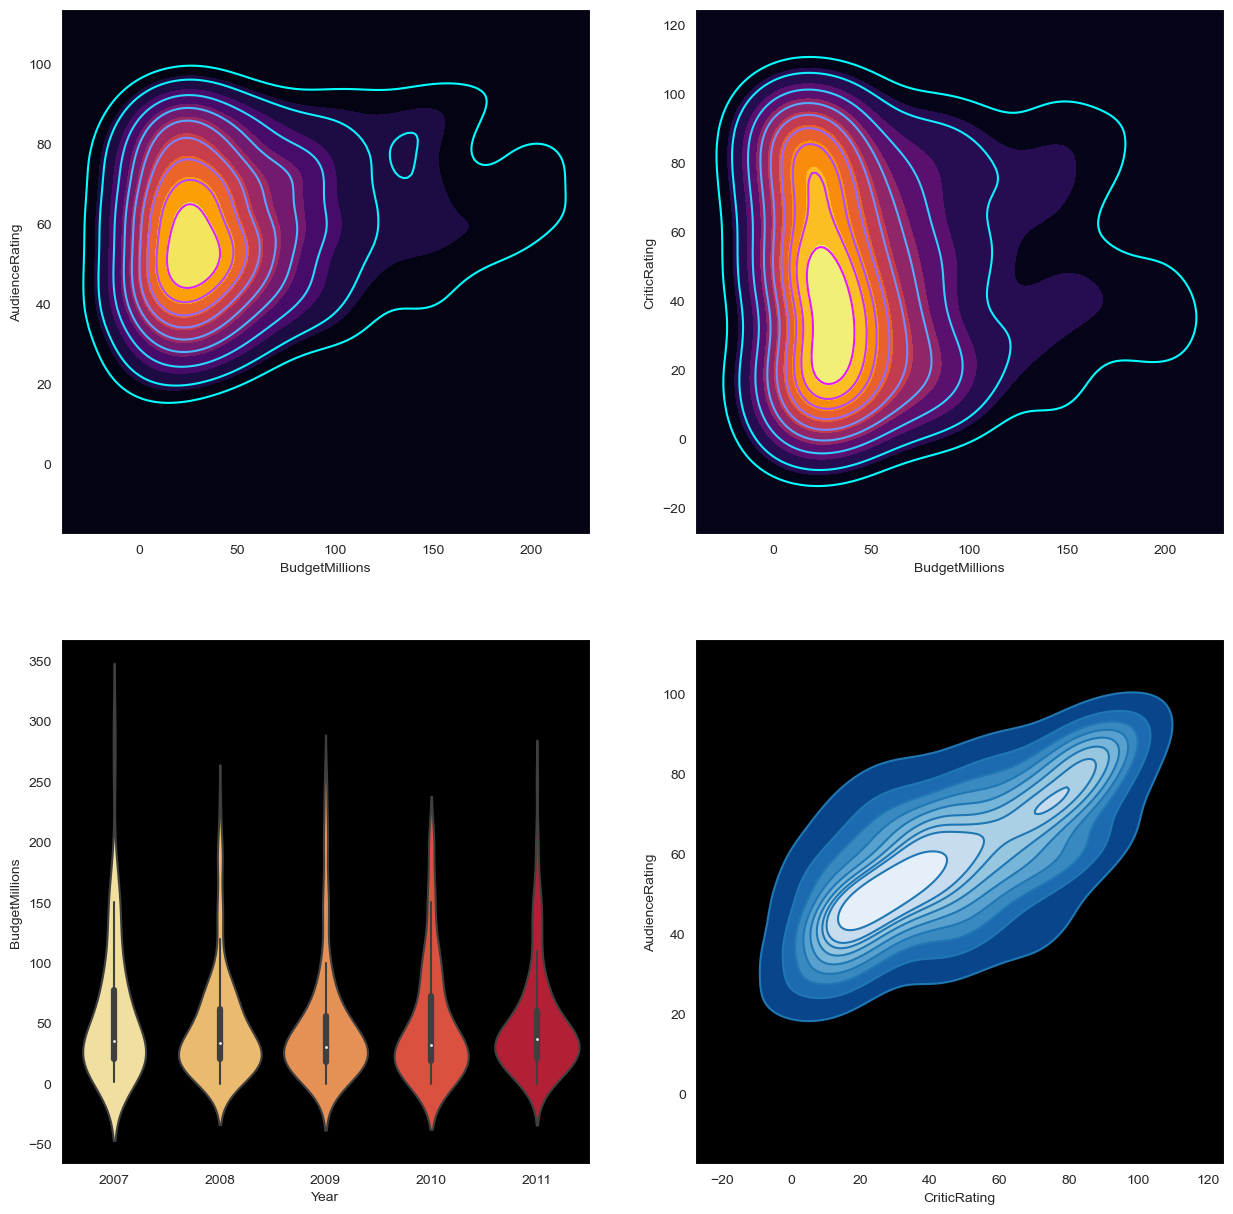

In [37]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize=(15,15))
#[0,0]
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, ax=axes[0,0], shade=True, shade_lowest=True, cmap="inferno")
k2b = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, ax=axes[0,0], cmap="cool")
k2.set(xlim=(-40,230))

#[0,1]
k3 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating, ax=axes[0,1], shade=True, shade_lowest=True, cmap="inferno")
k3b = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating, ax=axes[0,1], cmap="cool")
k3.set(xlim=(-40,230))

#[1,0]
z = sns.violinplot(data=movies, x="Year", y="BudgetMillions", ax=axes[1,0], palette="YlOrRd")

#[1,1]
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap="Blues_r", ax=axes[1,1])
k1b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, camp="gist_gray_r", ax=axes[1,1])

#axes[1,1].hist(movies.BudgetMillions, bins=10)

plt.show()

# Improved Visualization
---

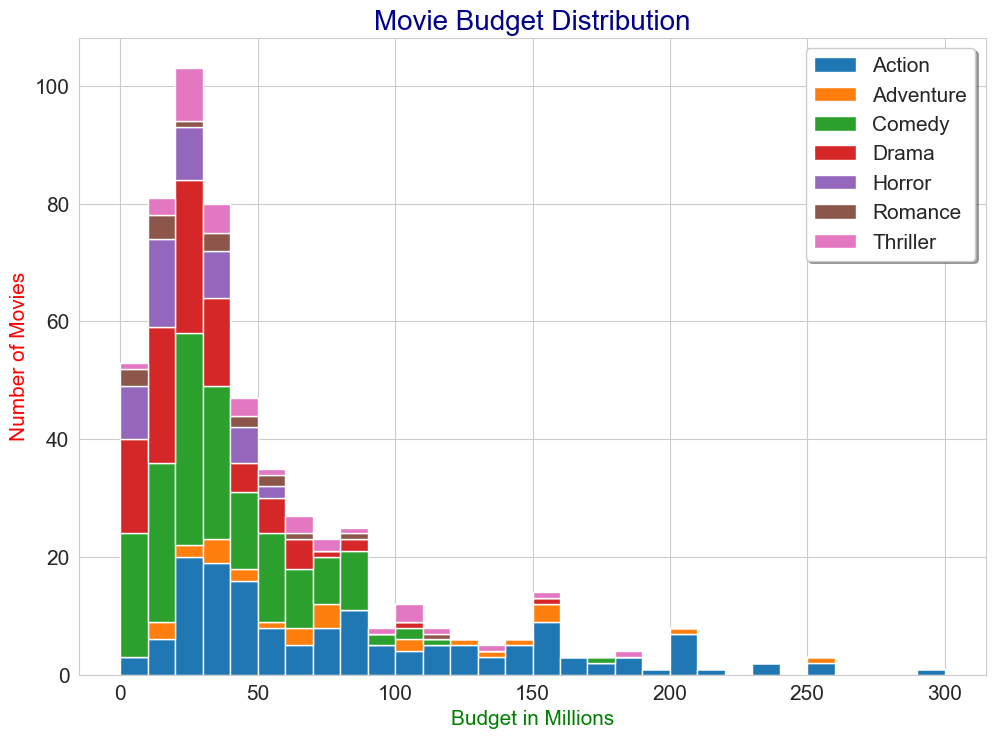

In [58]:
list1 = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #A4 size
plt.hist(list1, stacked=True, bins=30, rwidth=1, label=mylabels)
plt.legend(frameon=True,fancybox=True, shadow=True ,prop={"size":15})
plt.title("Movie Budget Distribution", fontsize=20, color="DarkBlue")
plt.ylabel("Number of Movies", fontsize=15, color="Red")
plt.xlabel("Budget in Millions", fontsize=15, color="Green")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()